<a href="https://colab.research.google.com/github/SergeyHSE/Bagging.github.io/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1**



In [7]:
#Let's load the load_wine data from sklearn.datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_wine
data = load_wine()

In [8]:
#We will exclude Class 2 objects from the training part.
X, y = data['data'], data['target']

y = np.expand_dims(y, axis=1)

data1 = np.concatenate((X, y), axis=1)
data2 = np.delete(data1, np.where(data1[:, -1] == 2), axis=0)
X_cut = np.delete(data2, 13, axis=1)
y_cut = np.delete(data2, np.s_[0:13], axis=1)
y = np.squeeze(y_cut, axis=-1)

X = pd.DataFrame(data=X_cut, columns=data.feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97, 13), (33, 13), (97,), (33,))

In [9]:
#We will train a random forest by setting only the hyperparameters n_estimators=100 and random_state=0.
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_train, y_train)
rfr.predict(X_test)

array([0.  , 0.99, 1.  , 0.95, 1.  , 0.03, 0.12, 0.  , 0.99, 0.  , 0.19,
       0.  , 0.02, 1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 1.  ,
       0.08, 0.  , 0.03, 0.01, 0.84, 0.43, 0.81, 0.01, 0.48, 0.99, 0.01])

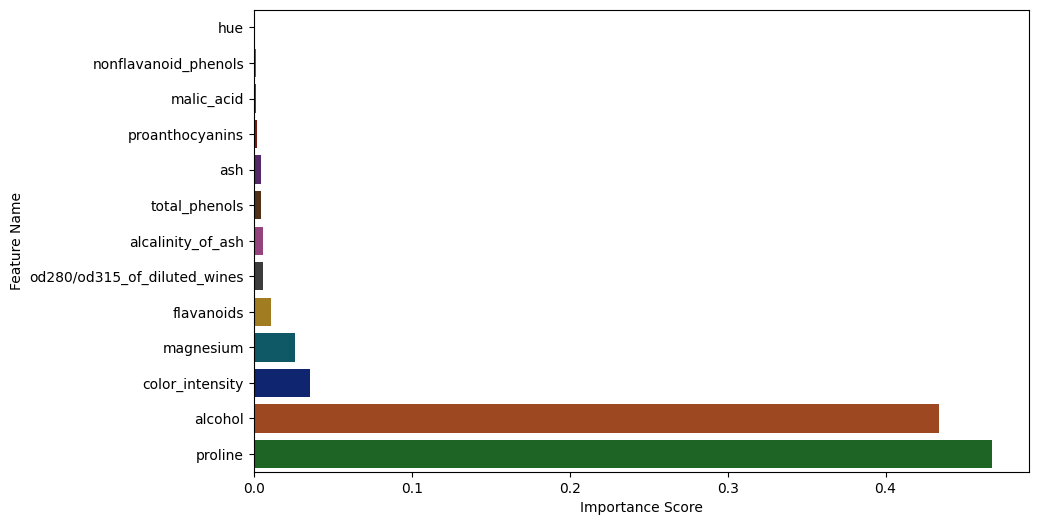

In [ ]:
#Let's evaluate the importance of the signs.
#We will make diagram and indicate the name of the two most important signs.
feature_imp = pd.DataFrame({'importances' : rfr.feature_importances_,
                            'name' : data.feature_names})
feature_imp = feature_imp.sort_values(by=['importances'])

custom_palette = sns.color_palette("dark", n_colors=len(feature_imp))
plt.figure(figsize=(10, 6))
sns.barplot(x='importances', y='name', data=feature_imp, palette=custom_palette)
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

In [ ]:
#Now we are scaling the features using the Standard Scale r class with default hyperparameters.
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)

rfr_sc = RandomForestRegressor(n_estimators=100, random_state=0)
rfr_sc.fit(X_train_scaler, y_train)

RandomForestRegressor(random_state=0)

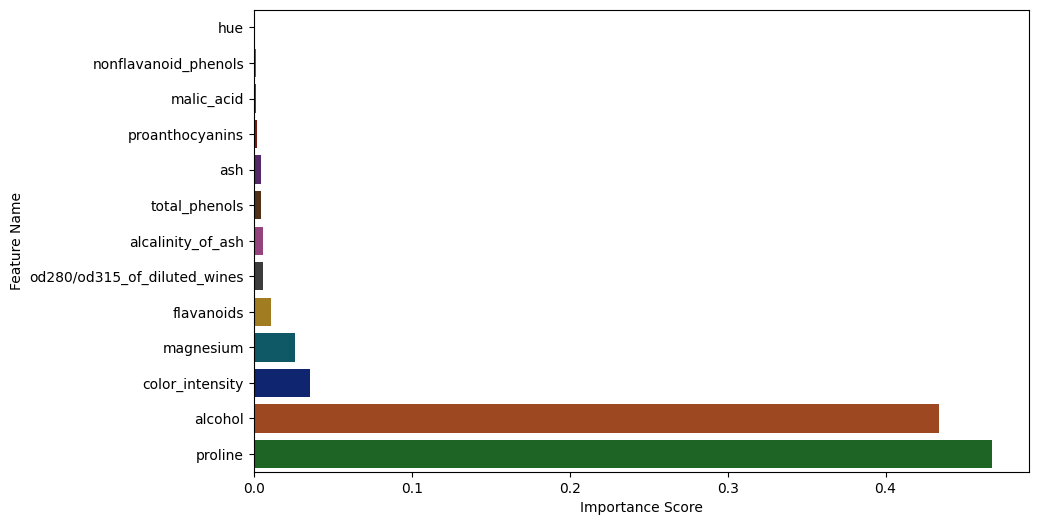

In [ ]:
#Let's evaluate the importance of the signs again and plot a graph to see the name of the two most important signs.
feature_imp_sc = pd.DataFrame({'importances' : rfr_sc.feature_importances_,
                               'name' : data.feature_names})

feature_imp_sc = feature_imp_sc.sort_values(by=['importances'])

custom_palette = sns.color_palette("dark", n_colors=len(feature_imp_sc))
plt.figure(figsize=(10, 6))
sns.barplot(x='importances', y='name', data=feature_imp_sc, palette=custom_palette)
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

We have got the same picture

##**2**

In [10]:
#In this part we are gonna work with anothe dataset 'data.csv'
from sklearn.metrics import mean_squared_error

In [11]:
from google.colab import files
file = files.upload()

Saving data.csv to data.csv


In [12]:
path = '/content/data.csv'
data = pd.read_csv(path, header=None, delimiter=',')
X, y = data.iloc[:, :100], data.iloc[:, 100]
x_train, y_train = X[:6000], y[:6000]
x_test, y_test = X[6000:], y[6000:]
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6000, 100), (6000,), (4000, 100), (4000,))

In [13]:
#Let's realize the Bagging class
class Bagging():
    def __init__(self, n_estimators=10):
        self.n_estimators = n_estimators
        self.regressors = []
    def fit(self, x_train, y_train):
        for i in range(self.n_estimators):
            np.random.seed(i)
            ind = np.random.choice(np.arange(x_train.shape[0]), size = x_train.shape[0])
            model = DecisionTreeRegressor(random_state=0)
            model.fit(x_train[ind], y_train[ind])
            self.regressors.append(model)

    def predict(self, x_test):
        res = np.zeros(x_test.shape[0])
        for i in self.regressors:
            res += i.predict(x_test)
        y_pred = res/self.n_estimators
        return y_pred

Let's train bagging on different indicators dessision tree algorithm.
And every tims we will evaluate the quality according to the MSE metric on the test part dividing the answer
by 1000 and rounding it up to the whole part.


In [14]:
bag = Bagging(n_estimators=1)
bag.fit(x_train, y_train)
y_predict = bag.predict(x_test)
MSE = mean_squared_error(y_test, y_predict)
answer = MSE/1000
print('Answer: ', answer)

Answer:  33.86433839207817
